In [205]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

## Second Dataset Class(r_s = 65)

In [206]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=3, n_classes=3, n_informative=2, n_clusters_per_class =1,n_redundant=0, n_repeated=0, random_state=65)

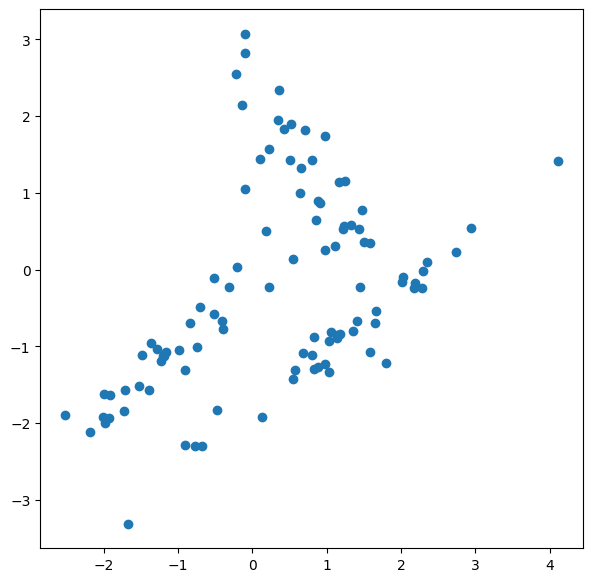

In [207]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

### K-Means++

In [208]:
from scipy.spatial.distance import cdist

In [209]:
# 'n_clusters': np.arange(1, 6, 1)

In [210]:
from sklearn.cluster import KMeans as KMeans

k_means_optimal = GridSearchCV(KMeans(), 
                                             {'n_clusters': np.arange(2, 3, 1),
                                              'init': ["k-means++", "random"],
                                              'n_init' : np.arange(1, 11, 1),
                                              'max_iter' : np.arange(1, 10, 1)
                                              },
                                              scoring='rand_score'
                                              ).fit(X, y)

In [211]:
k_means_optimal.best_estimator_

KMeans(max_iter=1, n_clusters=2, n_init=4)

In [212]:
k_means_optimal.best_params_

{'init': 'k-means++', 'max_iter': 1, 'n_clusters': 2, 'n_init': 4}

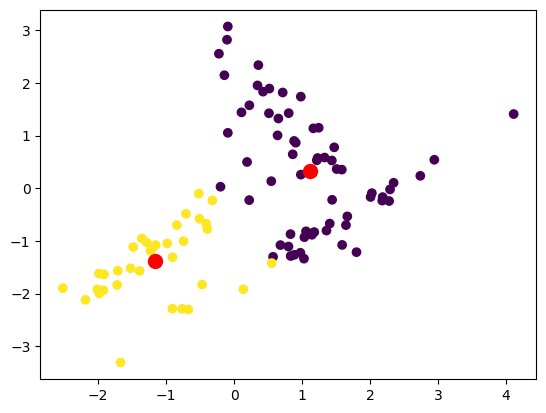

In [213]:
plt.scatter(X[:,0], X[:,1], c=k_means_optimal.best_estimator_.labels_)
plt.scatter(k_means_optimal.best_estimator_.cluster_centers_[:,0], k_means_optimal.best_estimator_.cluster_centers_[:,1], s=100, c='red')

### Metrics

In [214]:
from sklearn.metrics.cluster import rand_score

rand_score(k_means_optimal.best_estimator_.labels_, y)

0.6448484848484849

In [215]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(k_means_optimal.best_estimator_.labels_, y)

0.30905279706537403

In [216]:
from sklearn.metrics import silhouette_score

silhouette_score(X, k_means_optimal.best_estimator_.labels_)

0.3912934982290011

In [217]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, k_means_optimal.best_estimator_.labels_)

0.9584536917124313

### Affinity propagation

In [218]:
from sklearn.metrics import silhouette_score

{0, 1, 2}
0.3950279344460884


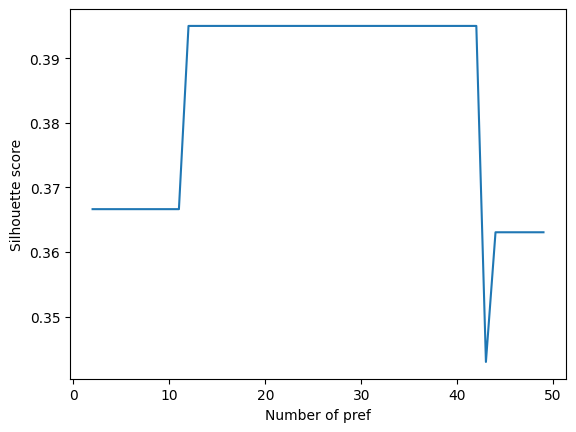

-88


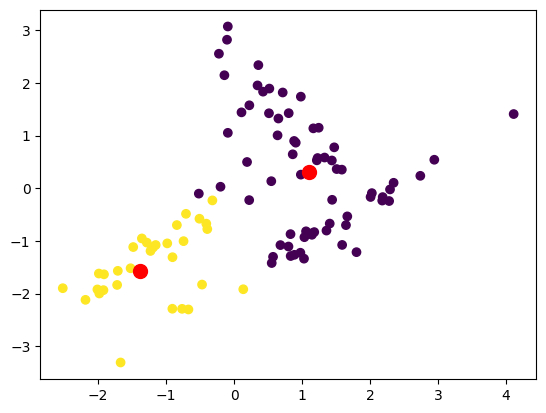

In [219]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
XX, yy = make_classification(n_samples=100, n_features=3, n_classes=3, n_informative=2, n_clusters_per_class =1,n_redundant=0, n_repeated=0, random_state=65)

ap = AffinityPropagation(damping=0.9, preference=-42).fit(XX)
ss = []
pp =[]
# Получаем метки кластеров для исходной модели
labels = ap.labels_
print(set(labels))
# Изменяем параметры модели и пересчитываем метки кластеров
for i in range(2, 50):
  ap.set_params(preference=-100+i)
  ap.fit(XX)
  new_labels = ap.labels_
  # print(np.unique(new_labels))
  score = silhouette_score(XX, new_labels)
  ss.append(score)
  pp.append(-100+i)

  # Обновляем метки кластеров для следующего шага цикла
  labels = new_labels
print(max(ss))

plt.plot(range(2, 50), ss)
plt.xlabel("Number of pref")
plt.ylabel("Silhouette score")
plt.show()
print(pp[np.argmax(ss)])
ap_final = AffinityPropagation(damping=0.9, preference=pp[np.argmax(ss)]).fit(XX)

plt.scatter(XX[:,0], XX[:,1], c=ap_final.labels_)
plt.scatter(ap_final.cluster_centers_[:,0], ap_final.cluster_centers_[:,1], s=100, c='red')

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Metrics

In [220]:
from sklearn.metrics.cluster import rand_score

rand_score(ap_final.labels_, y)

0.6315151515151515

In [221]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(ap_final.labels_, y)

0.28931003849570625

In [222]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, ap_final.labels_)

0.9357302582598934

In [223]:
from sklearn.metrics import silhouette_score

silhouette_score(XX, ap_final.labels_)

0.3950279344460884

### Dbscan

[-1  0  1  2  3  4]


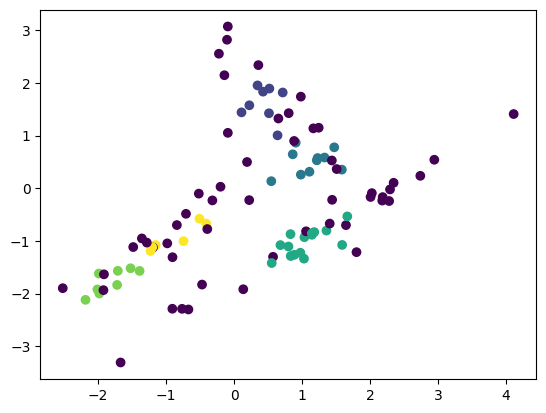

In [224]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=0.6).fit(X)
print(np.unique(dbscan.labels_))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

In [225]:
# from sklearn.cluster import DBSCAN
# import numpy as np
# X, y = make_classification(n_samples=100, n_features=3, n_classes=3, n_informative=2, n_clusters_per_class =1,n_redundant=0, n_repeated=0, random_state=23)
# dbscan = DBSCAN(eps=0.6).fit(X)
# labels = dbscan.labels_
# print(np.unique(labels))
# sscore = []
# ii = []
# eps =  np.linspace(0.1, 1, 10)
# for i in eps:
#     dbscan.set_params(eps=i)
#     dbscan.fit(X)
#     new_labels = dbscan.labels_
#     print(np.unique(new_labels))
#     score = silhouette_score(X, new_labels)
#     sscore.append(score)
#     ii.append(i)
#     labels = new_labels
  

# plt.plot(eps, sscore)

In [226]:
# from sklearn.cluster import DBSCAN
# import numpy as np
# dbscan = DBSCAN(eps=ii[np.argmax(sscore)]).fit(X)
# plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)


### Gaussian Mixtures

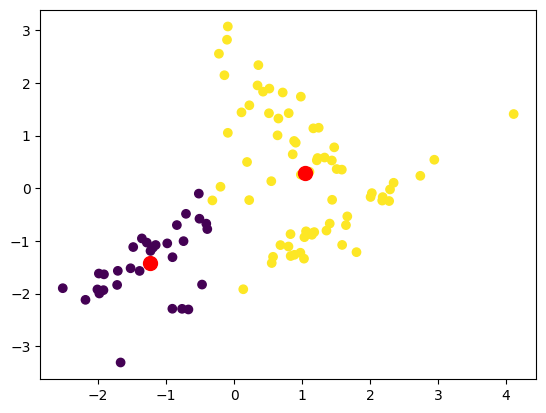

In [227]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2).fit(X)

gm.predict(X)

plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [228]:
from sklearn.mixture import GaussianMixture
param_grid = {
    'n_components': [2, 3, 4, 5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}
gm = GaussianMixture()
grid_search = GridSearchCV(gm, param_grid=param_grid, cv=5)
grid_search.fit(X)
print(grid_search.best_params_)

{'covariance_type': 'full', 'n_components': 3}


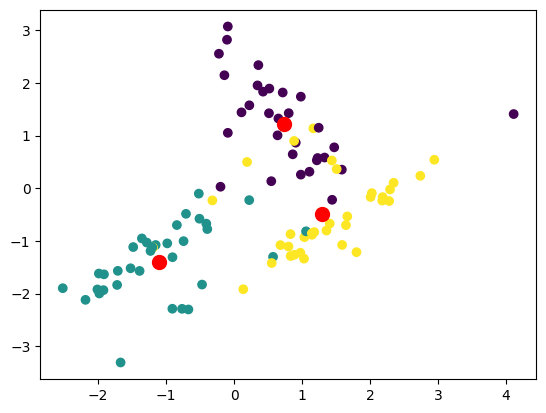

In [229]:
gm = GaussianMixture(n_components=3, covariance_type="tied").fit(X)
pred = gm.predict(X)
plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

In [230]:
from sklearn.metrics.cluster import rand_score

rand_score(pred, y)

0.7688888888888888

In [231]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(pred, y)

0.4749756763206687

In [232]:
from sklearn.metrics import silhouette_score

silhouette_score(X, pred)

0.34872905954542704

In [233]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, pred)

1.0930124829141363

### Иерархическая кластеризация

In [234]:
from scipy.cluster import hierarchy

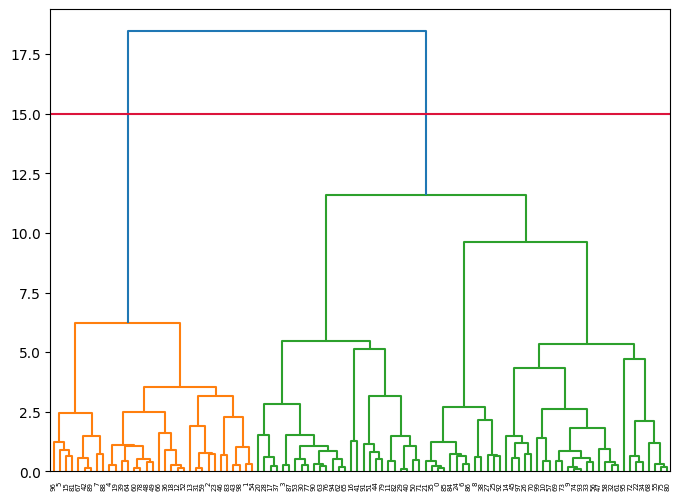

In [235]:
clusters = hierarchy.linkage(X, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson');

In [236]:
from sklearn.cluster import AgglomerativeClustering

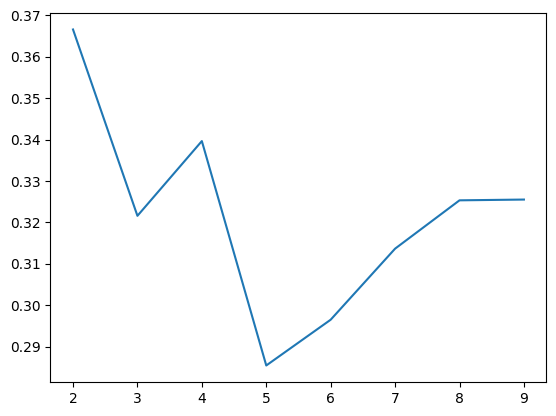

In [237]:
from sklearn.metrics import silhouette_score

ss = []
ii = []

for i in range(2, 10):
  ss.append(silhouette_score(X, AgglomerativeClustering(i).fit(X).labels_))
  ii.append(i)

plt.plot(range(2,10), ss)

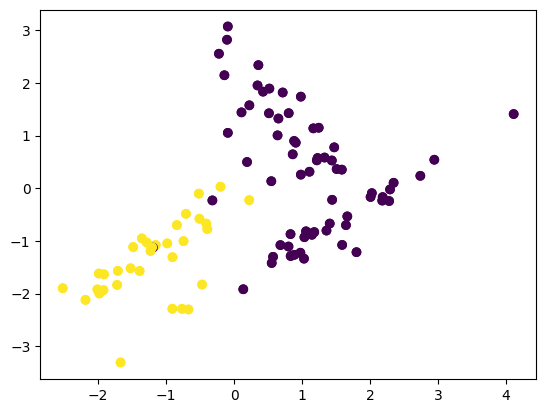

In [238]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=ii[np.argmax(ss)], linkage="ward").fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

### Metrics

In [239]:
from sklearn.metrics.cluster import rand_score

rand_score(clustering.labels_, y)

0.6488888888888888

In [240]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(clustering.labels_, y)

0.3228184467683868

In [241]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clustering.labels_)

0.3666173911842088

In [242]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, clustering.labels_)

0.988509862482857

## SOM

In [243]:
from sklearn_som.som import SOM
import matplotlib.pyplot as plt

In [244]:
iris_som = SOM(m=3, n=2, dim=3)
iris_som.fit(X)

In [245]:
predictions = iris_som.predict(X)

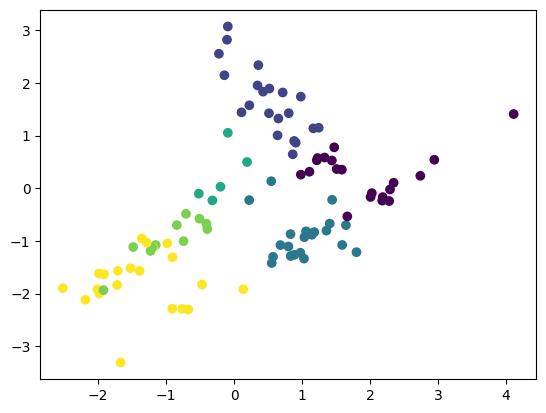

In [246]:
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.show()

### Metrics

In [247]:
from sklearn.metrics.cluster import rand_score

rand_score(y, predictions)

0.7355555555555555

In [248]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(predictions, y)

0.32214097810551606

In [249]:
from sklearn.metrics import silhouette_score

silhouette_score(X, predictions)

0.24647543433999247

In [250]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, predictions)

1.2646278465259744